In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Import data from csv file, create headers for each column based on the LabView VI.
df = pd.read_csv('p_only_sine.csv', index_col=False, skiprows=26, delimiter='\t',
                names=['time_s', 'goal_deg', 'true_deg', 'vel_deg', 'amp', 'freq_hz',
                         'sin0_or_sqr1', 'cmd_sig', 'controller'])
df.insert(3, 'error', df['goal_deg'] - df['true_deg'], True)
df.head()

,time_s,goal_deg,true_deg,error,vel_deg,amp,freq_hz,sin0_or_sqr1,cmd_sig,controller
0,0.015574,2.675314,0.273099,2.402215,36.412388,113.0,0.25,0.0,1.848029,1.0
1,0.016074,2.764038,0.280103,2.483935,38.558147,113.0,0.25,0.0,1.914584,1.0
2,0.016574,2.852778,0.286255,2.566523,39.794511,113.0,0.25,0.0,1.981138,1.0
3,0.017074,2.941517,0.291605,2.649912,40.252046,113.0,0.25,0.0,2.047677,1.0
4,0.017574,3.030236,0.296205,2.734031,40.051229,113.0,0.25,0.0,2.114228,1.0


<Axes: xlabel='time_s'>

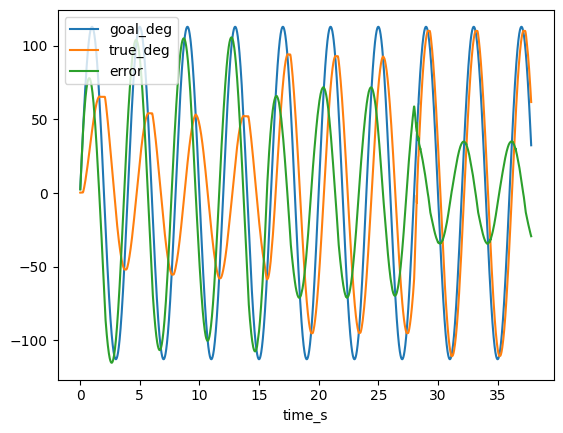

In [43]:
df.plot(x="time_s", y=['goal_deg', 'true_deg','error'])

<Axes: xlabel='time_s'>

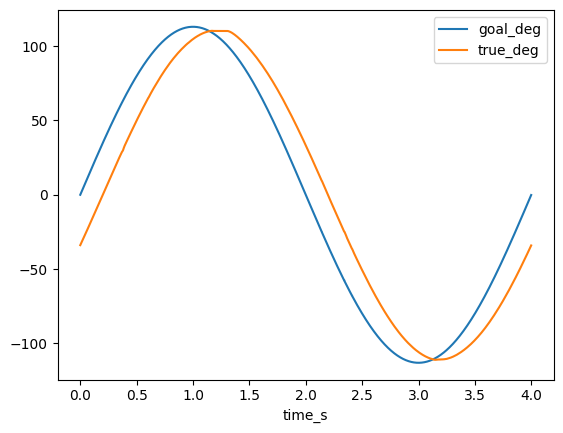

In [44]:
# Isolate one cycle
df = df[df['time_s'] > 32]
df = df[df['time_s'] < 36]

df['time_s'] = df['time_s'] - df['time_s'].min()

df.plot(x="time_s", y=['goal_deg', 'true_deg'])

In [45]:
# Mean, sdt, rms error
mean_error = np.mean(abs(df['error']))
std_error = np.std(df['error'])
rms_error = np.sqrt(np.mean(np.square(df['error'])))
print(f'mean: {mean_error} \n\nstd: {std_error} \n\nrms: {rms_error}')

mean: 22.02444157766319 

std: 24.443253346755604 

rms: 24.44483652091658


In [46]:
# Command statistics
command_mean = np.mean(abs(df['cmd_sig']))
command_std = np.std(df['cmd_sig'])
rms_command = np.sqrt(np.mean(np.square(df['cmd_sig'])))
print(f'mean: {command_mean} \n\nstd: {command_std} \n\nrms: {rms_command}')

mean: 107.00132985322601 

std: 118.76215502354117 

rms: 118.77030934873656


In [47]:
# Find percent overshoot
max = df['true_deg'].max()
overshoot = max - df['goal_deg'].max()
pc_overshoot = ((max/df['goal_deg'].max())-1)*100
print(overshoot, pc_overshoot)

-2.711383000000012 -2.3994541521737522


In [48]:
# Rise and settling time
rise = 0.86749 # seconds
# Settle not applicable

### p = 0.75
error

mean: -2.960954306750791 

std: 63.819604721061026 

rms: 63.88825554950723


command:

mean: -3.4600570747003103 

std: 58.58580761494025 

rms: 58.687893545900714

### p = 2

error:

mean: -3.773368632892251 

std: 101.37469708270491 

rms: 101.44489893262192

command:

mean: -2.9751221552614977 

std: 96.785366954506 

rms: 96.83108286266922

### p = 5

error

mean: -0.09020838790931443 

std: 122.88895234862703 

rms: 122.88898545799934

command

mean: 1.0921852390428255 

std: 118.80135699548129 

rms: 118.80637732278589